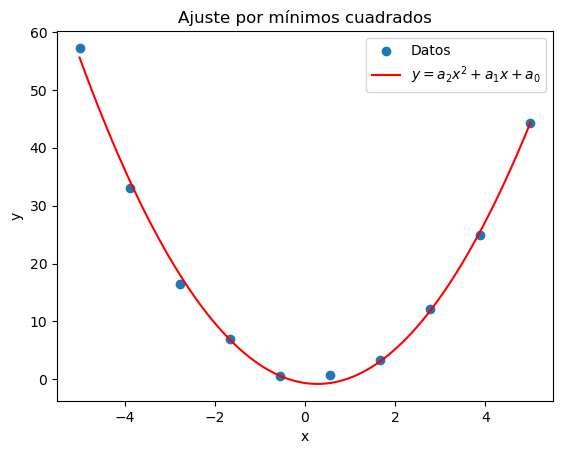

In [2]:
# Función cuadrática
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro a2.
    """
    c_2 = sum(x**4 for x in xs)
    c_1 = sum(x**3 for x in xs)
    c_0 = sum(x**2 for x in xs)
    c_ind = sum(y * x**2 for x, y in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro a1.
    """
    c_2 = sum(x**3 for x in xs)
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(y * x for x, y in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro a0.
    """
    c_2 = sum(x**2 for x in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

# Conjunto de datos 2
xs2 = [
    -5.0000, -3.8889, -2.7778, -1.6667, -0.5556,
    0.5556, 1.6667, 2.7778, 3.8889, 5.0000
]
ys2 = [
    57.2441, 33.0303, 16.4817, 7.0299, 0.5498,
    0.7117, 3.4185, 12.1767, 24.9167, 44.2495
]

import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar mínimos cuadrados
def ajustar_min_cuadrados(xs, ys, gradiente):
    A = []
    b = []
    for g in gradiente:
        coef = g(xs, ys)
        A.append(coef[:-1])
        b.append(coef[-1])
    A = np.array(A)
    b = np.array(b)
    params = np.linalg.solve(A, b)
    return params

# Ajustar los datos con la nueva función cuadrática
pars = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_2, der_parcial_1, der_parcial_0])

# Ecuación de la parábola
def parabola(x: float, pars: tuple[float]) -> float:
    """Ecuación de la parábola y = a2 * x^2 + a1 * x + a0.
    """
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

# Graficar los datos y la parábola ajustada
x = np.linspace(-5, 5, 100)
y = [parabola(xi, pars) for xi in x]

plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

